Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [10]:
import pandas as pd

In [11]:
yelp_df = pd.read_csv(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project\notebooks\yelp_data.csv")
salvador_station_df = pd.read_csv(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project\notebooks\salvador_station.csv")

In [12]:
yelp_df.head()

,Station Name,Latitude,Longitude,Search Term,Business Name,Business Category,Business Rating,Business Address,Business Phone,Business Distance (meters)
0,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Mamma's House,Restaurants,4.9,"R. das Margaridas,150",5.571335e+11,527.483624
1,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Acqua Café,Restaurants,4.3,"R. das Hortências, 600 - Pituba",5.571336e+11,47.248643
2,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Riz Bistrot & Risottos,Restaurants,3.9,"R. das Hortênsias, 966",5.571302e+11,328.793942
3,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Vignoli,Restaurants,4.4,"Av. Paulo VI, 1659",5.571302e+11,490.866547
4,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Adam Cozinha Originária,Restaurants,4.6,"R. Edith Mendes da Gama e Abreu, 189",5.571351e+11,208.535935


In [13]:
merged_df = pd.merge(yelp_df, salvador_station_df , on ="Station Name", how= "inner")

In [14]:
merged_result = merged_df.drop(columns=['Latitude_y', 'Longitude_y'])  # Retain lon_x and lat_x


In [15]:
merged_result.head()

,Station Name,Latitude_x,Longitude_x,Search Term,Business Name,Business Category,Business Rating,Business Address,Business Phone,Business Distance (meters),Free Bikes,Empty Slots
0,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Mamma's House,Restaurants,4.9,"R. das Margaridas,150",5.571335e+11,527.483624,3,8
1,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Acqua Café,Restaurants,4.3,"R. das Hortências, 600 - Pituba",5.571336e+11,47.248643,3,8
2,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Riz Bistrot & Risottos,Restaurants,3.9,"R. das Hortênsias, 966",5.571302e+11,328.793942,3,8
3,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Vignoli,Restaurants,4.4,"Av. Paulo VI, 1659",5.571302e+11,490.866547,3,8
4,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Adam Cozinha Originária,Restaurants,4.6,"R. Edith Mendes da Gama e Abreu, 189",5.571351e+11,208.535935,3,8


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
merged_result.describe()

,Latitude_x,Longitude_x,Business Rating,Business Phone,Business Distance (meters),Free Bikes,Empty Slots
count,6433.000000,6433.000000,6433.000000,5.660000e+03,6433.000000,6433.000000,6433.000000
mean,-12.995348,-38.479675,3.029675,7.008703e+11,941.052666,6.421110,7.314317
std,0.014793,0.041272,1.751941,8.347827e+11,472.751144,4.959196,4.588754
min,-13.013748,-38.532697,0.000000,5.571211e+11,7.923605,0.000000,0.000000
25%,-13.005958,-38.514973,2.700000,5.571324e+11,562.078379,2.000000,3.000000
50%,-12.999232,-38.485803,3.800000,5.571333e+11,953.808673,5.000000,7.000000
75%,-12.988270,-38.452353,4.200000,5.571336e+11,1334.503514,10.000000,11.000000
max,-12.936450,-38.327010,5.000000,5.572000e+12,2099.856618,21.000000,17.000000


In [18]:
correlation_matrix = merged_result[['Empty Slots', 'Free Bikes', 'Business Rating', 'Business Distance (meters)']].corr()


In [19]:
correlation_matrix

,Empty Slots,Free Bikes,Business Rating,Business Distance (meters)
Empty Slots,1.000000,-0.552377,-0.024495,-0.003991
Free Bikes,-0.552377,1.000000,0.038257,-0.003590
Business Rating,-0.024495,0.038257,1.000000,-0.093794
Business Distance (meters),-0.003991,-0.003590,-0.093794,1.000000


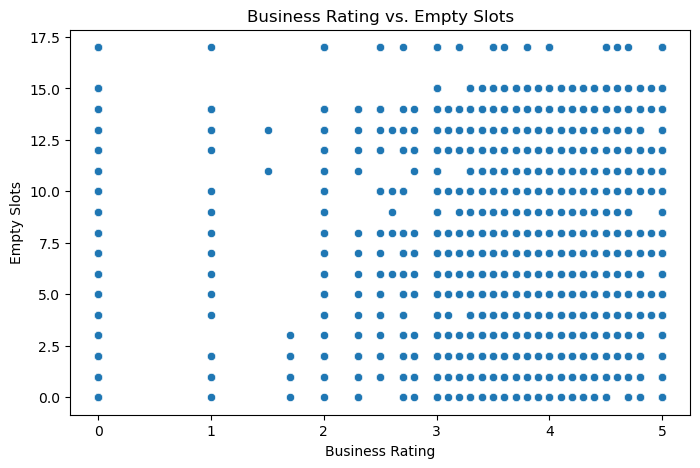

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_result, x='Business Rating', y='Empty Slots')
plt.title("Business Rating vs. Empty Slots")
plt.xlabel("Business Rating")
plt.ylabel("Empty Slots")
plt.show()


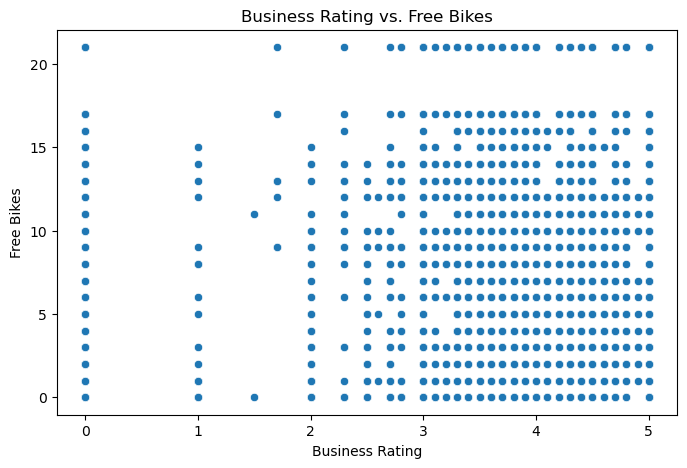

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_result, x='Business Rating', y='Free Bikes')
plt.title("Business Rating vs. Free Bikes")
plt.xlabel("Business Rating")
plt.ylabel("Free Bikes")
plt.show()


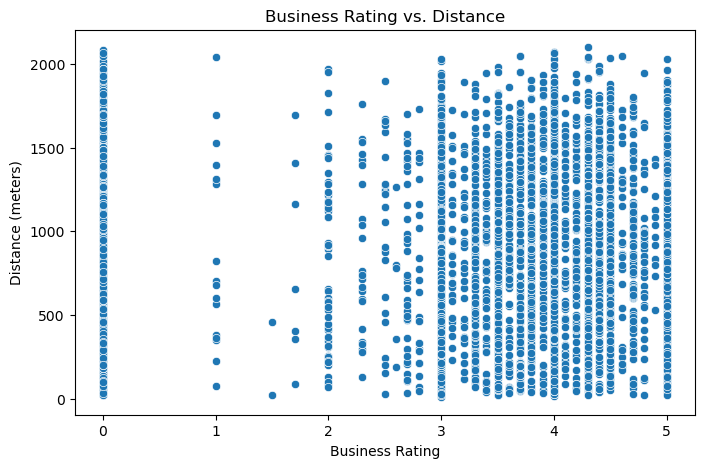

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_result, x='Business Rating', y='Business Distance (meters)')
plt.title("Business Rating vs. Distance")
plt.xlabel("Business Rating")
plt.ylabel("Distance (meters)")
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [24]:
import sqlite3
import pandas as pd
import os

# Ensure the data directory exists
os.makedirs('data', exist_ok=True)


# Create a connection to the SQLite3 database
db_path = os.path.join('data', 'database.sqlite')
conn = sqlite3.connect(db_path)  # Adjust the path as needed

# Save the DataFrame to the database
merged_result.to_sql('results', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print("DataFrame saved to SQLite3 database successfully.")

DataFrame saved to SQLite3 database successfully.


Look at the data before and after the join to validate your data.

In [26]:
yelp_df.shape

(6433, 10)

In [27]:
salvador_station_df.shape

(59, 5)

In [28]:
merged_result.shape

(6433, 12)

In [29]:
merged_df.shape

(6433, 14)